In [8]:
import sys
import os
import glob
import re
import uproot

# Añade el directorio padre al sys.path
sys.path.append(os.path.abspath("/eos/home-e/eramosca/WCTE/2025_data/nHits_trigger"))
sys.path.append('eos/home-e/eramosca/WCTE/software/hipy')

import hipy.pltext       as pltext
import matplotlib.pyplot as plt
import awkward           as ak
import numpy             as np
import matplotlib.colors as colors


from src.read_data                   import load_concatenated, read_parquet
from tqdm.notebook                   import tqdm
from WCTE_event_display.EventDisplay import EventDisplay

%load_ext autoreload
%autoreload 2

pltext.style()

ModuleNotFoundError: No module named 'hipy.pltext'

In [ ]:
# ============= LOADS THE DATA ===================
run  = 1766
data = load_concatenated(outdir=f"/eos/home-d/dcostasr/SWAN_projects/NiCf/offline_trigger/tmp_parquet/{run}")

In [ ]:
# =============== MASK OUT CARDS 130-132 ===================
run_cards, run_channels, run_slots, run_positions, run_times, run_events, run_charges = read_parquet(data, mask=True)

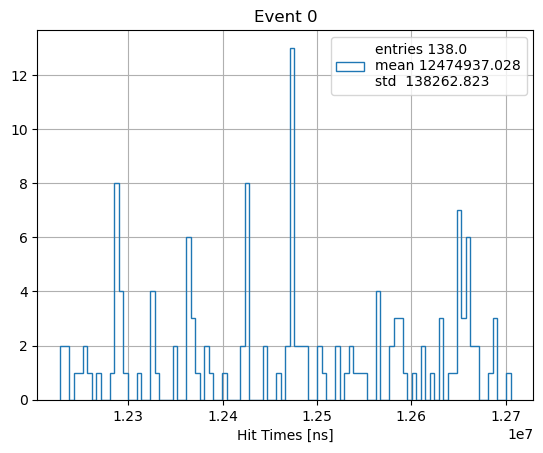

In [ ]:
event = 0
pltext.hist(run_times[event], 100);
plt.title(f"Event {event}")
plt.xlabel(f"Hit Times [ns]");

In [ ]:
# Vamos a plottear el evento 94 para comparar con Laurence
event = 0
pmt_id = (run_slots[event]*19 + run_positions[event])[(run_cards[event] < 120)]
data_to_plot = run_charges[event][(run_cards[event] < 120)]

(2014,)


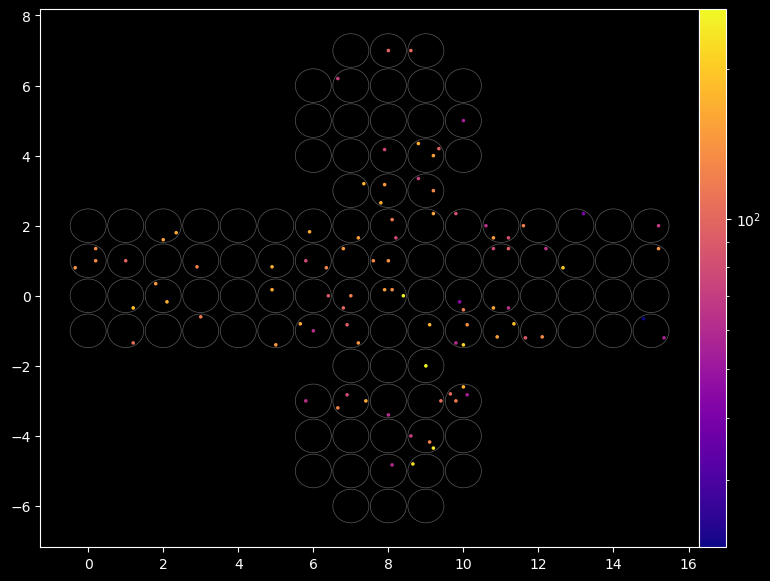

In [ ]:
eventDisplay = EventDisplay() 
eventDisplay.load_mPMT_positions('mPMT_2D_projection_angles.csv')

ev_disp_data = eventDisplay.process_data(pmt_id, data_to_plot, sum_data=False)
eventDisplay.plotEventDisplay(ev_disp_data, color_norm=colors.LogNorm(), style="dark_background", fig_width=10)

plt.show(block=False)
plt.style.use('default');